In [2]:
#2 March 31th, 2017    S&P 500: -0.23%
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kneed import DataGenerator, KneeLocator


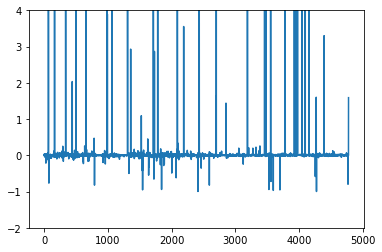

In [3]:
data = pd.read_csv("2.csv") 
price1=np.zeros(4779)
price2=np.zeros(4779)
price1=data['Price 3/30/2017'].values
price2=data['Price 3/31/2017'].values
pricechange=(price2-price1)/price1
pricechange.shape
x=np.arange(4779)
plt.plot(x,pricechange)
plt.ylim(-2,4)
plt.show()

67 25.349999999999994
337 11919.0
656 14.166666666666666
989 21.35714285714286
1309 35.19047619047619
1714 9689.0
1782 23.365853658536587
2091 27473.999999999996
2434 10.049250535331906
3191 5991.499999999999
3460 7223.999999999999
3483 2095.0
3555 426.50000000000006
3783 311.5
3927 1599.0
3947 29.419793145406608
4048 180.48148148148147
4098 110.37037037037037


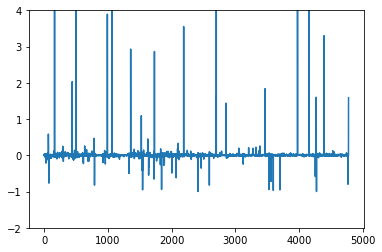

In [4]:
for i in range(4779):
    if pricechange[i]>10:
        print(i,pricechange[i])
        pricechange[i]=0
plt.plot(x,pricechange)
plt.ylim(-2,4)
plt.show()

In [5]:
cluster_distance=[]
clusters=[]
for k in range(40,170,5): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1
            count[int(price3index[i][0])][1]+=pricechange[i]
            center=count[:,1]/(count[:,0]+1e-9)

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print(k,total)
    cluster_distance.append(total)
    clusters.append(k)


40 14.852267693540728
45 14.280061027378242
50 14.002116519003437
55 14.553353382682726
60 13.33031440324148
65 13.02031604174024
70 12.981412783665256
75 12.919243409537525
80 12.947058111580827
85 12.801827756354143
90 12.46420569825371
95 12.427337383876033
100 12.464907330443403
105 12.380699483599468
110 12.425953931214956
115 12.370061864708159
120 12.260961290819715
125 12.111358965036953
130 12.140112656187569
135 12.235386647887719
140 12.208289400559032
145 12.022610772604125
150 12.038323323653316
155 11.969202001382293
160 12.063926010951182
165 11.969848773301614


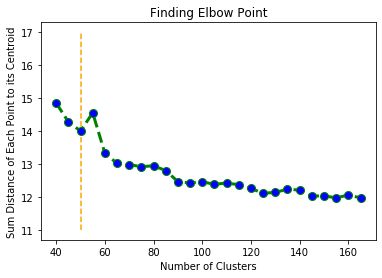

In [7]:
x=clusters
y=cluster_distance

from kneed import DataGenerator, KneeLocator 
kn=KneeLocator(x, y, curve='convex', direction='decreasing')



plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8) 

plt.vlines(kn.knee,11, 17,linestyles='dashed',color='orange')

# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('Finding Elbow Point') 
  
# function to show the plot 
plt.show()

In [8]:
kn.knee


50